# Integrating multiple scRNA-seq data

This tutorial shows loading, preprocessing, DAVAE integration and visualization of 293T and Jurkat cells in three different batches (Mixed Cell Lines).

### Importing scbean package
Here, we'll import scbean along with other popular packages.

In [1]:
import scbean.model.davae as davae
import scbean.tools.utils as tl
import scanpy as sc
import matplotlib
from numpy.random import seed
seed(2021)
matplotlib.use('TkAgg')

# Command for Jupyter notebooks only
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

### Loading data
This tutorial uses Mixed Cell Line datasets from [10xgenomics](https://www.10xgenomics.com/cn/) with non-overlapping populations from three batches, two of which contain 293t (2885 cells) and jurkat (3258 cells) cells respectively, and the third batch contains a 1:1 mixture of 293t and jurkat cells (3388 cells).

- Read from 10x mtx file\
The file in 10x mtx format can be downloaded [here](https://support.10xgenomics.com/single-cell-gene-expression/datasets/). Set the fmt parameter of pp.read_sc_data() function to '10x_mtx' to read the data downloaded from 10XGenomics. If the file downloaded from 10XGenomics is in h5 format, the dataset can be loaded by setting the fmt parameter to '10x_h5'.

In [2]:
base_path = "/Users/zhongyuanke/data/vipcca/mixed_cell_lines/"
file1 = base_path+"293t/hg19/"
file2 = base_path+"jurkat/hg19/"
file3 = base_path+"mixed/hg19/"

adata_b1 = tl.read_sc_data(file1, fmt='10x_mtx', batch_name="293t")
adata_b2 = tl.read_sc_data(file2, fmt='10x_mtx', batch_name="jurkat")
adata_b3 = tl.read_sc_data(file3, fmt='10x_mtx', batch_name="mixed")

- Read from h5ad file\
The h5ad file we generated that containing the cell type can be downloaded [here](http://141.211.10.196/result/test/papers/vipcca/data.tar.gz). Here, we load the three datasets separately.

In [3]:
base_path = "/Users/zhongyuanke/data/vipcca/mixed_cell_lines/"

adata_b1 = tl.read_sc_data(base_path+"293t.h5ad", batch_name="293t")
adata_b2 = tl.read_sc_data(base_path+"jurkat.h5ad", batch_name="jurkat")
adata_b3 = tl.read_sc_data(base_path+"mixed.h5ad", batch_name="mixed")

### Data preprocessing
Here, we filter and normalize each data separately and concatenate them into one AnnData object. For more details, please check the preprocessing [API](https://scbean.readthedocs.io/en/latest/api.html#module-scbean.tools.utils).

In [4]:
adata_all = tl.davae_preprocessing([adata_b1, adata_b2, adata_b3], index_unique="-")

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


### DAVAE Integration
The code for integration using davae is as following:

In [5]:
# Command for Jupyter notebooks only
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

adata_integrate = davae.fit_integration(
    adata_all, 
    batch_num=3,
    domain_lambda=2.0, 
    epochs=25, 
    sparse=True, 
    hidden_layers=[64, 32, 6]
)

Model: "vae_mlp"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 2000)]       0                                            
__________________________________________________________________________________________________
inputs_batch (InputLayer)       [(None, 3)]          0                                            
__________________________________________________________________________________________________
encoder_hx (Functional)         [(None, 6), (None, 6 131020      inputs[0][0]                     
                                                                 inputs_batch[0][0]               
                                                                 inputs[0][0]                     
                                                                 inputs_batch[0][0]         

38/38 [==============================] - 3s 12ms/step - loss: 6112.1558
Epoch 2/25
38/38 [==============================] - 0s 13ms/step - loss: 6163.5236
Epoch 3/25
38/38 [==============================] - 0s 12ms/step - loss: 3965.9096
Epoch 4/25
38/38 [==============================] - 0s 12ms/step - loss: 5549.9289
Epoch 5/25
38/38 [==============================] - 0s 12ms/step - loss: 4768.9558
Epoch 6/25
38/38 [==============================] - 0s 12ms/step - loss: 4695.5466
Epoch 7/25
38/38 [==============================] - 0s 12ms/step - loss: 4327.8423
Epoch 8/25
38/38 [==============================] - 0s 13ms/step - loss: 4365.8094
Epoch 9/25
38/38 [==============================] - 0s 12ms/step - loss: 4376.8790
Epoch 10/25
38/38 [==============================] - 0s 13ms/step - loss: 4391.7543
Epoch 11/25
38/38 [==============================] - 0s 12ms/step - loss: 4488.7633
Epoch 12/25
38/38 [==============================] - 0s 13ms/step - loss: 4407.2095
Epoch 13/25


In [ ]:
adata_integrate

1.The meta.data of each cell has been saved in adata.obs

2.The embedding representation of davae for each cell have been saved in adata.obsm('X_davae')

**Loading result from h5ad file:**
You can also download and use the integrated results. The output.h5ad file of the DAVAE result can be downloaded here

In [9]:
integrate_path = '/Users/zhongyuanke/data/dann_vae/pbmc/davae_save02.h5ad'
adata_integrate = sc.read_h5ad(integrate_path)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [6]:
adata_integrate

AnnData object with n_obs × n_vars = 9530 × 2000
    obs: '_batch', 'celltype', 'n_genes', 'percent_mito', 'n_counts', 'size_factor', 'loss_weight', 'batch_label', 'batch'
    var: 'gene_ids', 'n_cells-0-0', 'highly_variable-0-0', 'means-0-0', 'dispersions-0-0', 'dispersions_norm-0-0', 'n_cells-1-0', 'highly_variable-1-0', 'means-1-0', 'dispersions-1-0', 'dispersions_norm-1-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    obsm: 'X_davae'

### UMAP Visualization
We use UMAP to reduce the embedding feature output by DAVAE in 2 dimensions.

In [7]:
import umap
adata_integrate.obsm['X_umap']=umap.UMAP().fit_transform(adata_integrate.obsm['X_davae'])

... storing '_batch' as categorical
... storing 'celltype' as categorical


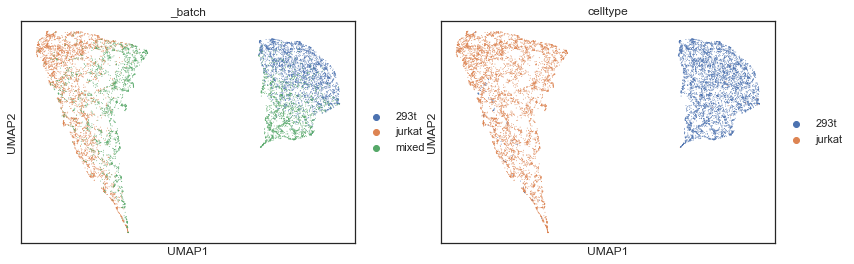

In [8]:
sc.pl.umap(adata_integrate, color=['_batch', 'celltype'], s=3)